AIRBNB LA MARKET ANALYSIS (April-June 2023)

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading datasets...
✓ Loaded 3,886 top performers
✓ Loaded 44,464 total listings
✓ Loaded profit metrics for 44,464 listings

Merging datasets...
✓ Data cleaning complete

CORRECTED MARKET METRICS

Total Listings in Final Dataset: 44,464
Top 20% Winners: 3,457
TRUE MARKET PERCENTAGE: 7.8%

STRATEGIC ANALYSIS SUMMARY

--- KEY METRICS (Winners vs Standard) ---
                   price_clean        number_of_reviews         total_revenue  \
                          mean median              mean median           mean   
status                                                                          
Standard Listing    265.038359  135.0         33.202307    4.0   24908.862621   
Top 20% Profitable  445.011571  390.0         28.312988    7.0  134919.961238   

                             occup

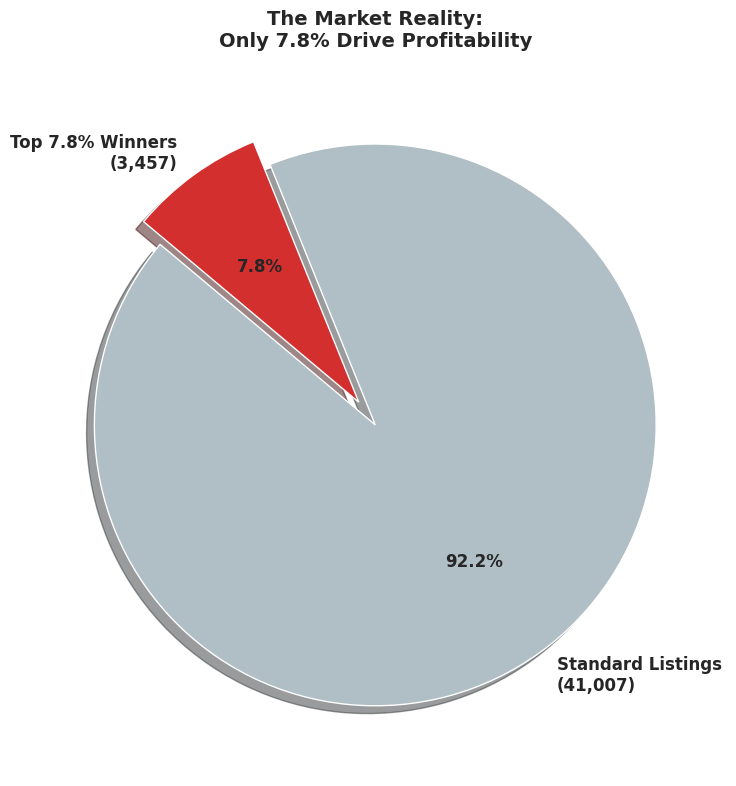


[Chart 2 of 6] Location Strategy - Top Neighborhoods


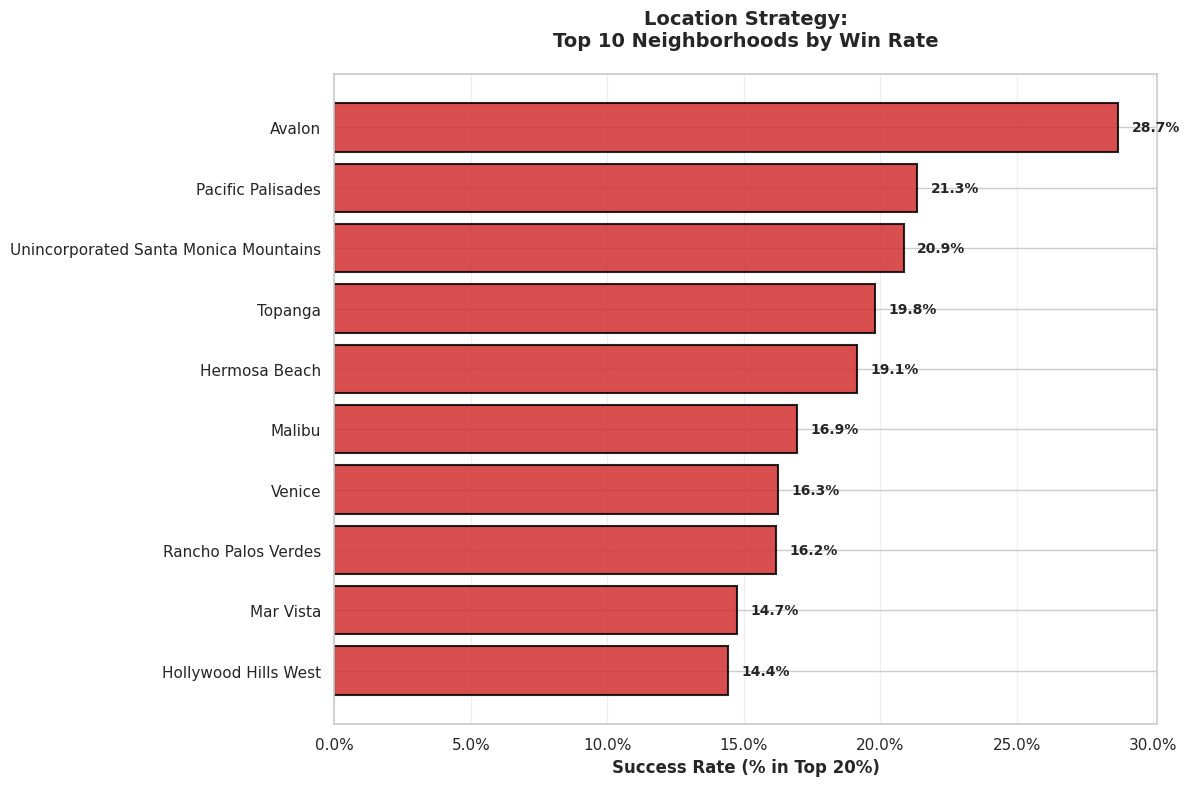


[Chart 3 of 6] Occupancy Engine - Winners vs Standard


/tmp/ipython-input-1336369922.py:247: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=occ_data, x='status', y='occupancy_pct', palette=palette_status, ax=ax3,
/tmp/ipython-input-1336369922.py:254: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(['Standard', 'Top 20%'], fontsize=12)


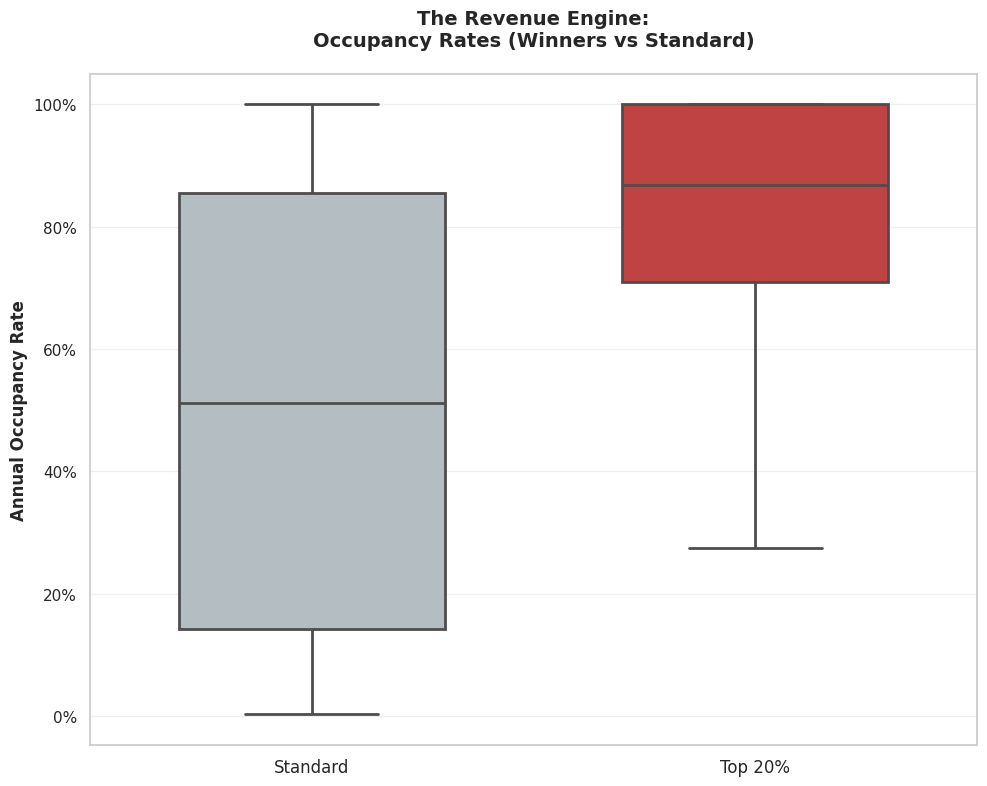


[Chart 4 of 6] Product Fit - Room Type Performance


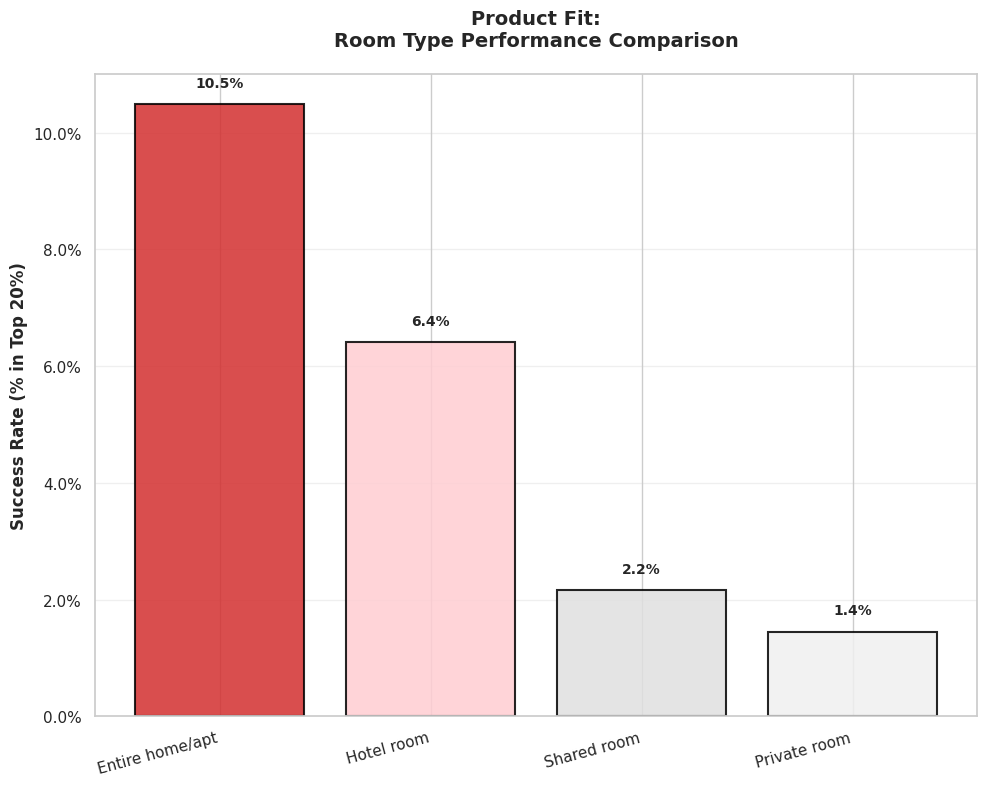


[Chart 5 of 6] Host Scale Paradox - Revenue by Portfolio Size


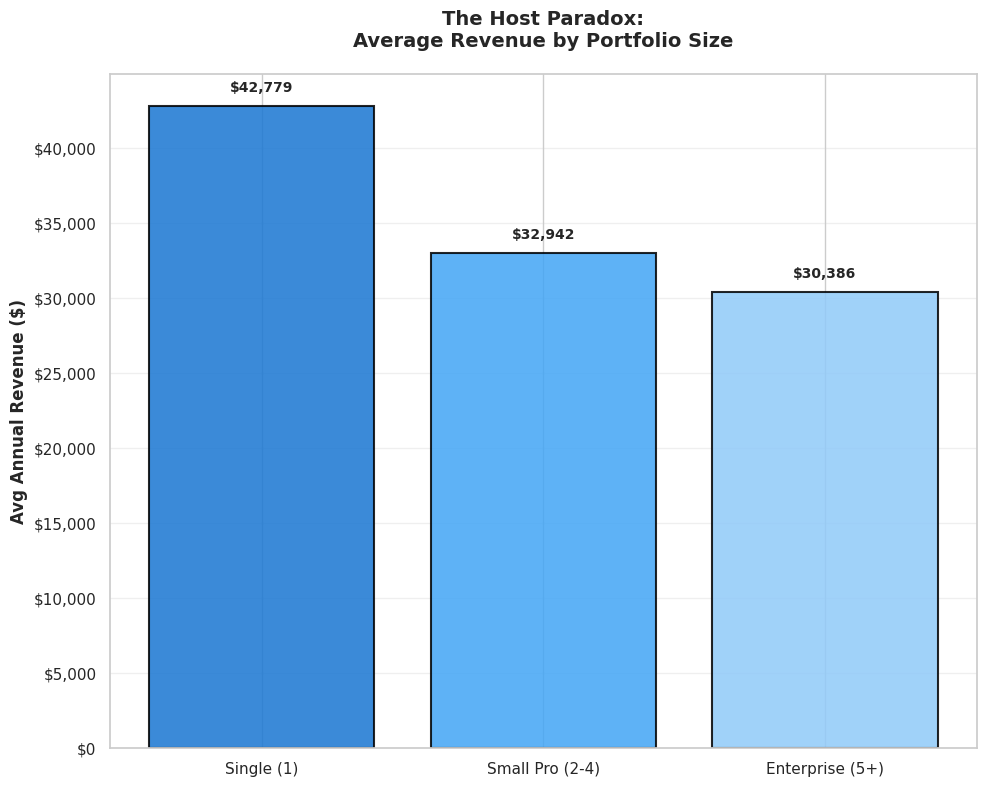


[Chart 6 of 6] Flexibility Strategy - Minimum Stay Impact


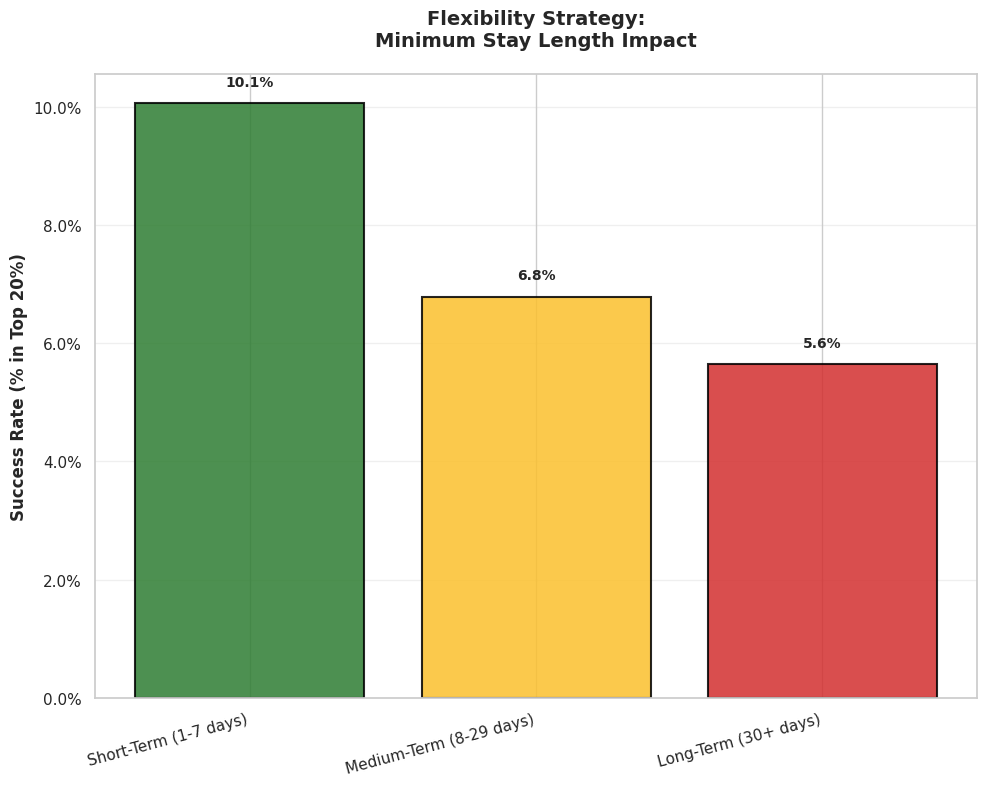


ANALYSIS COMPLETE

✓ All 6 charts generated successfully!
✓ Analysis based on 44,464 listings
✓ Winners identified: 3,457 (7.8%)

Right-click any chart to copy and paste into your slides.


In [4]:

# What makes a listing successful

from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

print("="*70)
print("AIRBNB LA MARKET ANALYSIS (April-June 2023)")
print("="*70)
print("\nMounting Google Drive...")
drive.mount('/content/drive', force_remount=False)

sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.family': 'sans-serif', 'font.size': 11})

path_clean = '/content/drive/MyDrive/School/finalprojectdata/airbnbclean/'
path_raw_q2 = '/content/drive/MyDrive/School/finalprojectdata/LA_2023.4-6/'

print("Loading datasets...")
top_20_df = pd.read_csv(f'{path_clean}top20percent2023_4_6.csv')
listings_df = pd.read_csv(f'{path_raw_q2}listings.csv')
profit_df = pd.read_csv(f'{path_clean}listingprofit_4_6.csv')

print(f"✓ Loaded {len(top_20_df):,} top performers")
print(f"✓ Loaded {len(listings_df):,} total listings")
print(f"✓ Loaded profit metrics for {len(profit_df):,} listings")

print("\nMerging datasets...")

# Flag top 20% winners
listings_df['is_top_20'] = listings_df['id'].isin(top_20_df['listing_id'])
listings_df['status'] = listings_df['is_top_20'].apply(
    lambda x: 'Top 20% Profitable' if x else 'Standard Listing'
)

# Merge revenue data
profit_subset = profit_df[['listing_id', 'total_revenue', 'booked_days']].copy()
listings_df = listings_df.merge(profit_subset, left_on='id', right_on='listing_id', how='left')

# Clean price column
def clean_price(x):
    if isinstance(x, str):
        return float(x.replace('$', '').replace(',', ''))
    return float(x)

listings_df['price_clean'] = listings_df['price'].apply(clean_price)

# Create feature: occupancy percentage
listings_df['occupancy_pct'] = (listings_df['booked_days'] / 365).clip(upper=1.0)

# Create feature: host portfolio size
listings_df['host_size'] = pd.cut(
    listings_df['calculated_host_listings_count'],
    bins=[0, 1, 4, 500],
    labels=['Single (1)', 'Small Pro (2-4)', 'Enterprise (5+)']
)

# Create feature: stay flexibility strategy
listings_df['stay_strategy'] = pd.cut(
    listings_df['minimum_nights'],
    bins=[0, 7, 29, 365],
    labels=['Short-Term (1-7 days)', 'Medium-Term (8-29 days)', 'Long-Term (30+ days)']
)

print("✓ Data cleaning complete")

print("\n" + "="*70)
print("CORRECTED MARKET METRICS")
print("="*70)

total_listings_final = len(listings_df)
top_20_count_final = listings_df['is_top_20'].sum()
true_percentage = (top_20_count_final / total_listings_final) * 100

print(f"\nTotal Listings in Final Dataset: {total_listings_final:,}")
print(f"Top 20% Winners: {top_20_count_final:,}")
print(f"TRUE MARKET PERCENTAGE: {true_percentage:.1f}%")

print("\n" + "="*70)
print("STRATEGIC ANALYSIS SUMMARY")
print("="*70)

# Summary Statistics
print("\n--- KEY METRICS (Winners vs Standard) ---")
summary_stats = listings_df.groupby('status')[['price_clean', 'number_of_reviews', 'total_revenue', 'occupancy_pct']].agg(['mean', 'median'])
print(summary_stats)

print(f"\n--- REVENUE COMPARISON ---")
winners_revenue = summary_stats.loc['Top 20% Profitable', ('total_revenue', 'mean')]
standard_revenue = summary_stats.loc['Standard Listing', ('total_revenue', 'mean')]
print(f"Winners Avg Annual Revenue: ${winners_revenue:,.2f}")
print(f"Standard Avg Annual Revenue: ${standard_revenue:,.2f}")
print(f"Gap: ${winners_revenue - standard_revenue:,.2f} (+{((winners_revenue - standard_revenue) / standard_revenue * 100):.0f}%)")

print(f"\n--- OCCUPANCY COMPARISON ---")
winners_occ_median = summary_stats.loc['Top 20% Profitable', ('occupancy_pct', 'median')]
standard_occ_median = summary_stats.loc['Standard Listing', ('occupancy_pct', 'median')]
winners_occ_mean = summary_stats.loc['Top 20% Profitable', ('occupancy_pct', 'mean')]
standard_occ_mean = summary_stats.loc['Standard Listing', ('occupancy_pct', 'mean')]
print(f"Winners Occupancy (Median): {winners_occ_median:.1%}")
print(f"Standard Occupancy (Median): {standard_occ_median:.1%}")
print(f"Winners Occupancy (Mean): {winners_occ_mean:.1%}")
print(f"Standard Occupancy (Mean): {standard_occ_mean:.1%}")

print(f"\n--- PRICING COMPARISON ---")
winners_price = summary_stats.loc['Top 20% Profitable', ('price_clean', 'mean')]
standard_price = summary_stats.loc['Standard Listing', ('price_clean', 'mean')]
print(f"Winners Avg Price: ${winners_price:,.2f}/night")
print(f"Standard Avg Price: ${standard_price:,.2f}/night")
print(f"Premium: {((winners_price - standard_price) / standard_price * 100):.0f}%")

print("\n--- TOP 10 NEIGHBORHOODS BY SUCCESS RATE ---")
hood_counts = listings_df['neighbourhood'].value_counts()
sig_hoods = hood_counts[hood_counts > 100].index
hood_df = listings_df[listings_df['neighbourhood'].isin(sig_hoods)]
hood_stats = hood_df.groupby('neighbourhood')['status'].value_counts(normalize=True).unstack().fillna(0)
hood_stats['Success_Rate'] = hood_stats.get('Top 20% Profitable', 0)
hood_stats = hood_stats.sort_values('Success_Rate', ascending=False).head(10)

print(f"{'NEIGHBORHOOD':<30} | {'WIN RATE':<10} | {'TOTAL LISTINGS':<15}")
print("-" * 70)
for hood, row in hood_stats.iterrows():
    print(f"{hood:<30} | {row['Success_Rate']:.1%}     | {hood_counts[hood]:<15}")

print("\n--- WIN RATE BY ROOM TYPE ---")
room_stats = listings_df.groupby('room_type')['status'].value_counts(normalize=True).unstack().fillna(0)
room_stats['Success_Rate'] = room_stats.get('Top 20% Profitable', 0)
room_stats = room_stats.sort_values('Success_Rate', ascending=False)

print(f"{'ROOM TYPE':<25} | {'WIN RATE':<10} | {'WINNERS':<10} | {'TOTAL'}")
print("-" * 70)
for room, row in room_stats.iterrows():
    winners = listings_df[(listings_df['room_type'] == room) & (listings_df['is_top_20'])].shape[0]
    total = listings_df[listings_df['room_type'] == room].shape[0]
    print(f"{room:<25} | {row['Success_Rate']:.1%}     | {winners:<10} | {total}")

print("\n--- HOST SCALE EFFECT (Revenue & Win Rate) ---")
host_revenue = listings_df.groupby('host_size', observed=True).agg({
    'total_revenue': ['mean', 'median', 'count'],
    'is_top_20': 'sum'
}).round(0)

host_revenue.columns = ['Avg_Revenue', 'Median_Revenue', 'Total_Listings', 'Winners']
host_revenue['Win_Rate'] = (host_revenue['Winners'] / host_revenue['Total_Listings']).apply(lambda x: f"{x:.1%}")

print(host_revenue)

print("\n--- FLEXIBILITY STRATEGY IMPACT (Min Stay Length) ---")
stay_stats = listings_df.groupby('stay_strategy', observed=True).agg({
    'id': 'count',
    'is_top_20': 'sum',
    'total_revenue': ['mean', 'median'],
    'price_clean': 'mean'
}).round(0)

stay_stats.columns = ['Total_Listings', 'Winners', 'Avg_Revenue', 'Median_Revenue', 'Avg_Price']
stay_stats['Win_Rate'] = (stay_stats['Winners'] / stay_stats['Total_Listings']).apply(lambda x: f"{x:.1%}")
stay_stats = stay_stats.sort_values('Winners', ascending=False)

print(stay_stats)

print("\n" + "="*70)
print("GENERATING CHARTS...")
print("="*70)
print("\n[Chart 1 of 6] Market Reality - Market Concentration")

fig1, ax1 = plt.subplots(figsize=(10, 8))
sizes = listings_df['status'].value_counts()
labels = [f'Standard Listings\n({sizes["Standard Listing"]:,})',
          f'Top {true_percentage:.1f}% Winners\n({sizes["Top 20% Profitable"]:,})']
colors_pie = ['#B0BEC5', '#D32F2F']
explode = (0, 0.1)
wedges, texts, autotexts = ax1.pie(sizes, labels=labels, colors=colors_pie, autopct='%1.1f%%',
                                     startangle=140, explode=explode, shadow=True,
                                     textprops={'fontsize': 12, 'weight': 'bold'})
ax1.set_title(f'The Market Reality:\nOnly {true_percentage:.1f}% Drive Profitability',
              fontweight='bold', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

print("\n[Chart 2 of 6] Location Strategy - Top Neighborhoods")

fig2, ax2 = plt.subplots(figsize=(12, 8))
hood_plot = hood_stats.sort_values('Success_Rate', ascending=True)
bars = ax2.barh(range(len(hood_plot)), hood_plot['Success_Rate'], color='#D32F2F', alpha=0.85, edgecolor='black', linewidth=1.5)
ax2.set_yticks(range(len(hood_plot)))
ax2.set_yticklabels(hood_plot.index, fontsize=11)
ax2.set_xlabel('Success Rate (% in Top 20%)', fontsize=12, fontweight='bold')
ax2.set_title('Location Strategy:\nTop 10 Neighborhoods by Win Rate', fontweight='bold', fontsize=14, pad=20)
ax2.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.grid(axis='x', alpha=0.3)
for i, (idx, row) in enumerate(hood_plot.iterrows()):
    ax2.text(row['Success_Rate'] + 0.005, i, f"{row['Success_Rate']:.1%}",
             va='center', fontweight='bold', fontsize=10)
plt.tight_layout()
plt.show()

print("\n[Chart 3 of 6] Occupancy Engine - Winners vs Standard")

fig3, ax3 = plt.subplots(figsize=(10, 8))
occ_data = listings_df[listings_df['occupancy_pct'] <= 1.0][['status', 'occupancy_pct']]
palette_status = {"Top 20% Profitable": "#D32F2F", "Standard Listing": "#B0BEC5"}
sns.boxplot(data=occ_data, x='status', y='occupancy_pct', palette=palette_status, ax=ax3,
            width=0.6, showfliers=False, linewidth=2)
ax3.set_ylabel('Annual Occupancy Rate', fontsize=12, fontweight='bold')
ax3.set_xlabel('')
ax3.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax3.set_title('The Revenue Engine:\nOccupancy Rates (Winners vs Standard)',
              fontweight='bold', fontsize=14, pad=20)
ax3.set_xticklabels(['Standard', 'Top 20%'], fontsize=12)
ax3.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n[Chart 4 of 6] Product Fit - Room Type Performance")

fig4, ax4 = plt.subplots(figsize=(10, 8))
room_plot = listings_df.groupby('room_type')['is_top_20'].mean().sort_values(ascending=False).head(4)
colors_room = ['#D32F2F', '#FFCDD2', '#E0E0E0', '#F0F0F0']
bars = ax4.bar(range(len(room_plot)), room_plot.values, color=colors_room[:len(room_plot)],
               alpha=0.85, edgecolor='black', linewidth=1.5)
ax4.set_xticks(range(len(room_plot)))
ax4.set_xticklabels(room_plot.index, fontsize=11, rotation=15, ha='right')
ax4.set_ylabel('Success Rate (% in Top 20%)', fontsize=12, fontweight='bold')
ax4.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax4.set_title('Product Fit:\nRoom Type Performance Comparison', fontweight='bold', fontsize=14, pad=20)
ax4.grid(axis='y', alpha=0.3)
for i, v in enumerate(room_plot.values):
    ax4.text(i, v + 0.003, f"{v:.1%}", ha='center', fontweight='bold', fontsize=10)
plt.tight_layout()
plt.show()

print("\n[Chart 5 of 6] Host Scale Paradox - Revenue by Portfolio Size")

fig5, ax5 = plt.subplots(figsize=(10, 8))
host_rev_plot = listings_df.groupby('host_size', observed=True)['total_revenue'].mean().sort_values(ascending=False)
colors_host = ['#1976D2', '#42A5F5', '#90CAF9']
bars = ax5.bar(range(len(host_rev_plot)), host_rev_plot.values, color=colors_host,
               alpha=0.85, edgecolor='black', linewidth=1.5)
ax5.set_xticks(range(len(host_rev_plot)))
ax5.set_xticklabels(host_rev_plot.index, fontsize=11)
ax5.set_ylabel('Avg Annual Revenue ($)', fontsize=12, fontweight='bold')
ax5.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax5.set_title('The Host Paradox:\nAverage Revenue by Portfolio Size', fontweight='bold', fontsize=14, pad=20)
ax5.grid(axis='y', alpha=0.3)
for i, v in enumerate(host_rev_plot.values):
    ax5.text(i, v + 1000, f"${v:,.0f}", ha='center', fontweight='bold', fontsize=10)
plt.tight_layout()
plt.show()

print("\n[Chart 6 of 6] Flexibility Strategy - Minimum Stay Impact")

fig6, ax6 = plt.subplots(figsize=(10, 8))
stay_plot = listings_df.groupby('stay_strategy', observed=True)['is_top_20'].mean().sort_values(ascending=False)
colors_stay = ['#2E7D32', '#FBC02D', '#D32F2F']
bars = ax6.bar(range(len(stay_plot)), stay_plot.values, color=colors_stay,
               alpha=0.85, edgecolor='black', linewidth=1.5)
ax6.set_xticks(range(len(stay_plot)))
ax6.set_xticklabels(stay_plot.index, fontsize=11, rotation=15, ha='right')
ax6.set_ylabel('Success Rate (% in Top 20%)', fontsize=12, fontweight='bold')
ax6.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax6.set_title('Flexibility Strategy:\nMinimum Stay Length Impact', fontweight='bold', fontsize=14, pad=20)
ax6.grid(axis='y', alpha=0.3)
for i, v in enumerate(stay_plot.values):
    ax6.text(i, v + 0.003, f"{v:.1%}", ha='center', fontweight='bold', fontsize=10)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("ANALYSIS COMPLETE")
print("="*70)
print(f"\n✓ All 6 charts generated successfully!")
print(f"✓ Analysis based on {total_listings_final:,} listings")
print(f"✓ Winners identified: {top_20_count_final:,} ({true_percentage:.1f}%)")
print(f"\nRight-click any chart to copy and paste into your slides.")
